<a href="https://colab.research.google.com/github/sistelca/Msgclientes/blob/master/valentin_task_event.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import numpy as np
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# Asignacion de nombres a las columnas (task events)
Segun documento: Google cluster-usage traces format shema 2013-11-17 external
Task events table
The task events table contains the following fields:
1. timestamp (timestamp)
2. missing info (miss_info)
3. job ID (job_ID)
4. task index - within the job (task_ind_job)
5. machine ID (machine_ID)
6. event type (event_type)
7. user name (user_name)
8. scheduling class (sched_class)
9. priority (priority)
10. resource request for CPU cores (res_req_CPU_cor)
11. resource request for RAM (res_req_RAM)
12. resource request for local disk space (re_req_disk)
13. different-machine constraint (diff_mach_constr)


In [3]:
import tarfile
import os

columns = ['timestamp', 'miss_info', 'job_ID', 'task_ind_job', 'machine_ID', 
           'event_type', 'user_name', 'sched_class', 'priority', 
           'res_req_CPU_cor', 'res_req_RAM', 'res_req_disk', 'diff_mach_constr']

 
carpeta = '/content/gdrive/My Drive/task_events/'

datos = pd.read_csv(carpeta + 'part-00000-of-00500.csv.gz', sep=',',
                    header=None, names=columns, compression='gzip')

# se elminan variables que no se van usar
datos = datos.drop(['miss_info', 'machine_ID', 'event_type', 'user_name', 
                    'sched_class', 'priority', 'diff_mach_constr'], axis=1)

archivos = sorted(os.listdir(carpeta))

print("Agregando \t Archivo \t Tamaño")
var = len(archivos)
i = 1
for archi in archivos:
    if archi != 'part-00000-of-00500.csv.gz':
        frames = pd.read_csv(carpeta+archi, sep=',',
                    header=None, names=columns, compression='gzip')
        frames = frames.drop(['miss_info', 'machine_ID', 'event_type',
                              'user_name', 'sched_class', 'priority',
                              'diff_mach_constr'], axis=1)
        datos = pd.concat([datos, frames], ignore_index = True) 
        print("%d / %d \t %s \t %d" % (archivos.index(archi)+1, var, archi, datos.shape[0]))
        i +=1
     
    if i > 39: # este control es para evitar consumir toda la memoria 
      break    # que ofrece google

# se eliminan filas con datos faltantes
datos = datos[datos.timestamp != 0]
datos = datos[datos.res_req_CPU_cor != 0]
datos = datos[datos.res_req_RAM != 0]
print('listo', datos.shape)


Agregando 	 Archivo 	 Tamaño
2 / 500 	 part-00001-of-00500.csv.gz 	 527922
3 / 500 	 part-00002-of-00500.csv.gz 	 688564
4 / 500 	 part-00003-of-00500.csv.gz 	 803964
5 / 500 	 part-00004-of-00500.csv.gz 	 919519
6 / 500 	 part-00005-of-00500.csv.gz 	 1086990
7 / 500 	 part-00006-of-00500.csv.gz 	 1240991
8 / 500 	 part-00007-of-00500.csv.gz 	 1429340
9 / 500 	 part-00008-of-00500.csv.gz 	 1561991
10 / 500 	 part-00009-of-00500.csv.gz 	 1827856
11 / 500 	 part-00010-of-00500.csv.gz 	 2048560
12 / 500 	 part-00011-of-00500.csv.gz 	 2211842
13 / 500 	 part-00012-of-00500.csv.gz 	 2427998
14 / 500 	 part-00013-of-00500.csv.gz 	 2609335
15 / 500 	 part-00014-of-00500.csv.gz 	 2972910
16 / 500 	 part-00015-of-00500.csv.gz 	 3168741
17 / 500 	 part-00016-of-00500.csv.gz 	 3432153
18 / 500 	 part-00017-of-00500.csv.gz 	 3759570
19 / 500 	 part-00018-of-00500.csv.gz 	 4749995
20 / 500 	 part-00019-of-00500.csv.gz 	 7159614
21 / 500 	 part-00020-of-00500.csv.gz 	 9766805
22 / 500 	 part-00021-o

In [4]:
etiqueta_col = {'timestamp':'timestamp',
                'miss_info':'missing info',
                'job_ID':'job ID', 
                'task_ind_job':'task index - within the job', 
                'machine_ID':'machine ID', 
                'event_type':'event type', 
                'user_name':'user name', 
                'sched_class':'scheduling class', 
                'priority':'priority', 
                'res_req_CPU_cor':'resource request for CPU cores', 
                'res_req_RAM':'resource request for RAM', 
                'res_req_disk':'resource request for local disk space', 
                'diff_mach_constr':'different-machine constraint'}

count_vars = datos.count()
print('{:<2} {:<28} {:53}  {}'.format('','\033[1m'+'variable'+'\033[0m', 
                                '\033[1m'+'descripcion'+'\033[0m',
                                '\033[1m'+'count'+'\033[0m'))
# 15 = 23 - 8 (8 son los char agregados para negrilla y fin de negrilla)
# 45 = 53 - 8 (8 son los char agregados para negrilla y fin de negrilla)

i = 1
for k in count_vars.keys():
    print('{:2} {:<20} {:45}  {}'.format(i, k, etiqueta_col[k], count_vars[k]))
    i += 1

   variable             descripcion                                    count
 1 timestamp            timestamp                                      21042398
 2 job_ID               job ID                                         21042398
 3 task_ind_job         task index - within the job                    21042398
 4 res_req_CPU_cor      resource request for CPU cores                 21042398
 5 res_req_RAM          resource request for RAM                       21042398
 6 res_req_disk         resource request for local disk space          21042398


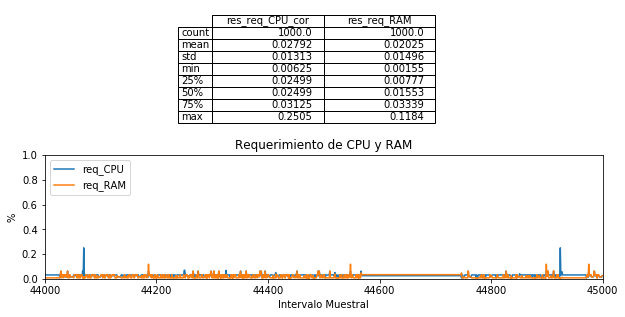

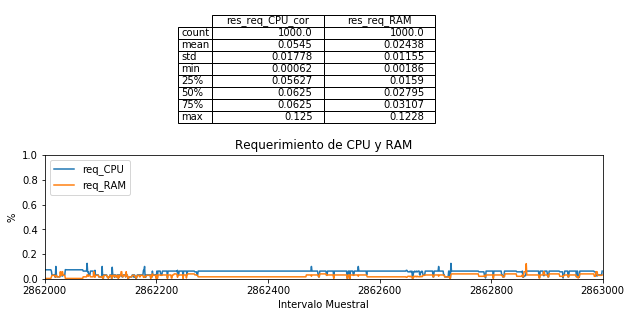

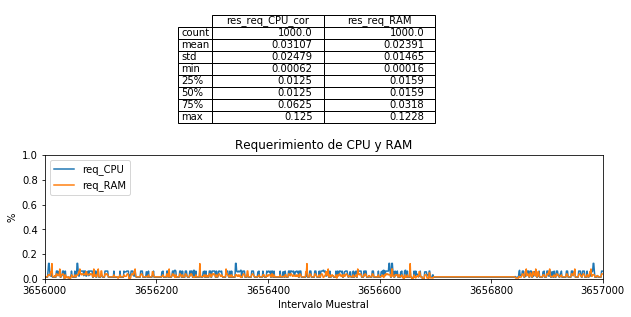

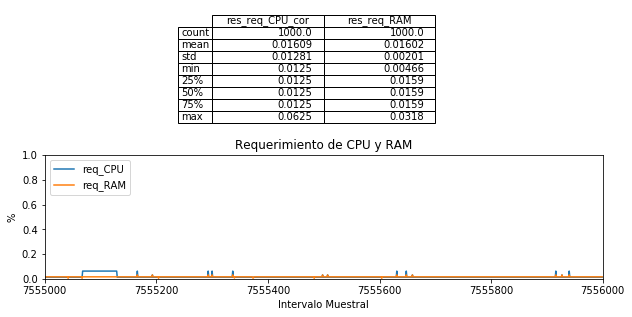

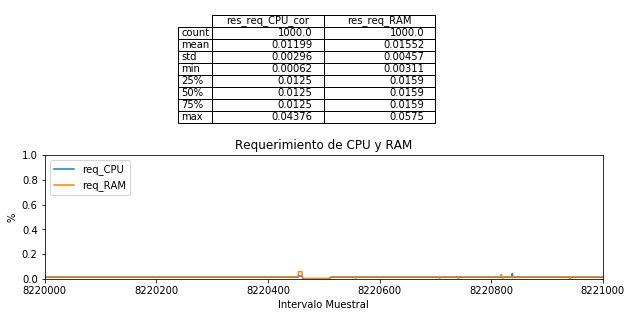

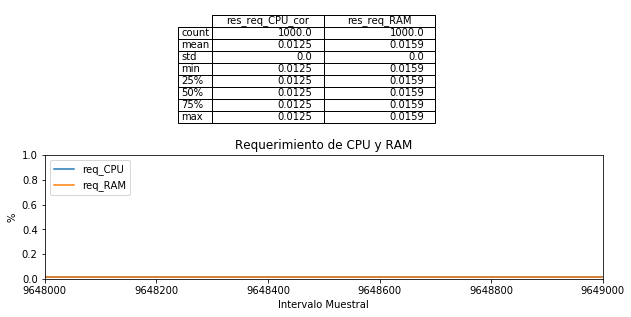

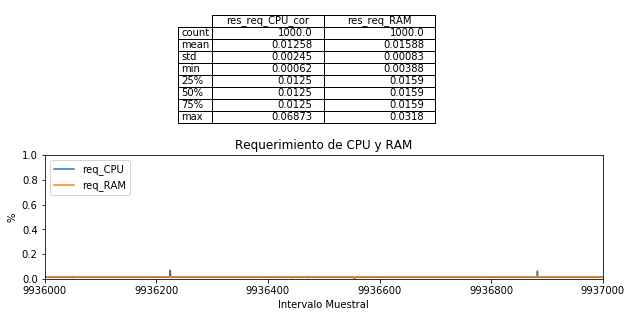

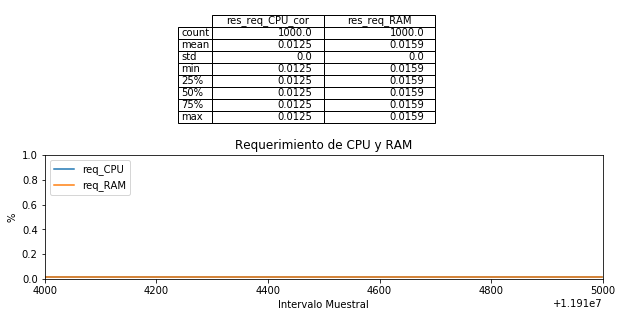

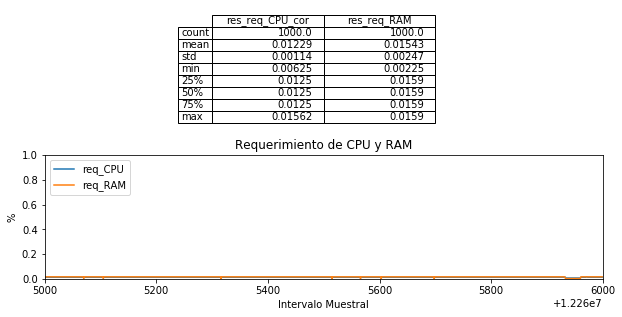

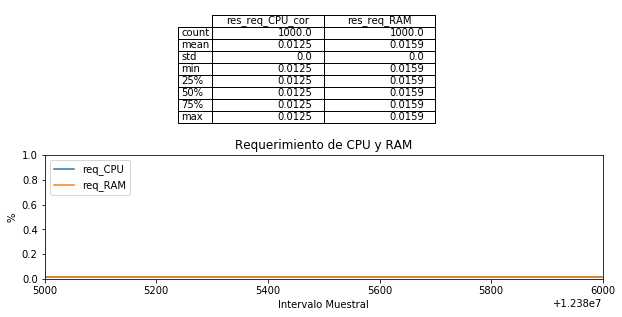

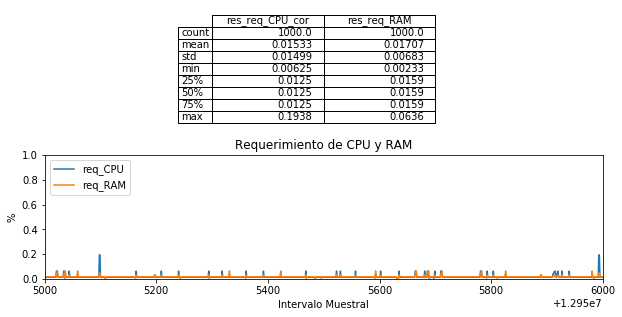

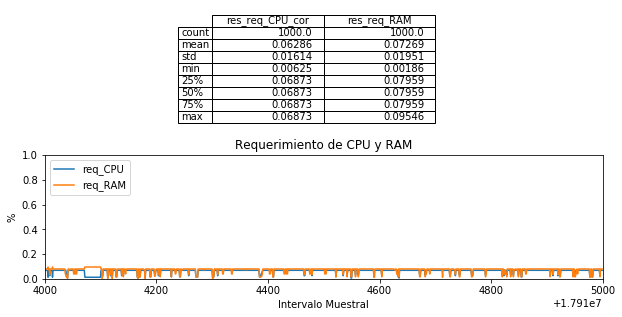

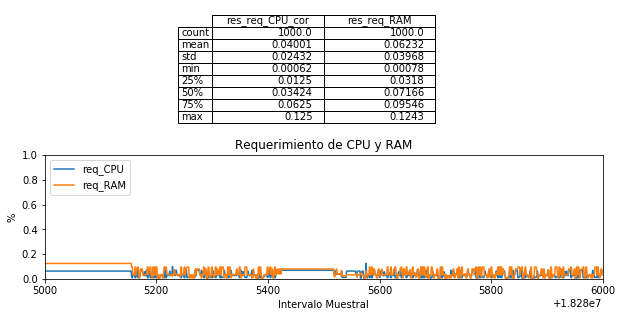

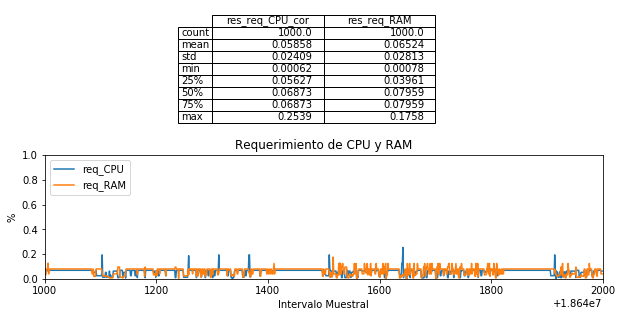

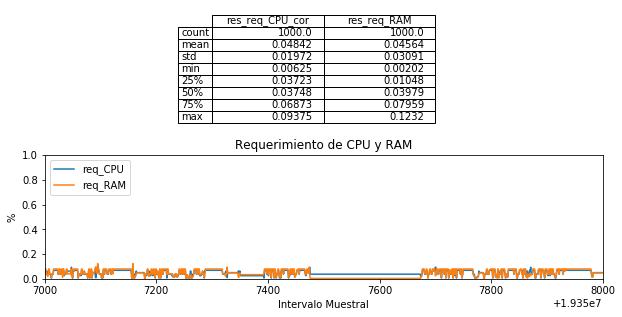

In [5]:
# tomando 1000 datos para prueba
import random
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 5

# haremos 15 graficas para direferentes secuencias de registros de esta tabla;
# cada secuencia tendra una longitud de 1000 registros, y seran seleccionadas
# al azar del conjunto de datos

def calc_intervalos(tot_reg, num_graficas = 15, cantidad_reg_x_interv = 1000):
  

  num_secuencias = tot_reg//cantidad_reg_x_interv

  poblacion = [i*cantidad_reg_x_interv for i in range(num_secuencias-1)]

  muestra =  sorted(random.sample(poblacion, num_graficas))

  intervalos = [[muestra[i], muestra[i]+cantidad_reg_x_interv]
                for i in range(len(muestra))]
  
  return intervalos
  
intervalos = calc_intervalos(datos.shape[0])

intervalos_muestrales = []
for li, ls in intervalos:
  prueba = datos[li:ls]

  # se almacenan valores de estimaciones de interes para la investigacion
  estimadores = prueba[['res_req_CPU_cor', 'res_req_RAM']].describe()
  dic_estimadores = {'res_req_CPU_cor':{'mean':estimadores.res_req_CPU_cor['mean'],
                                        'std':estimadores.res_req_CPU_cor['std']},
                     'res_req_RAM':{'mean':estimadores.res_req_RAM['mean'],
                                    'std':estimadores.res_req_RAM['std']}}
  intervalos_muestrales.append(dic_estimadores)
  
  
  y1 = prueba['res_req_CPU_cor']

  y2 = prueba['res_req_RAM']

  # eje x
  t = np.arange(li, ls)
  
  fig, axs = plt.subplots(2, 1)
  axs[0].axis('tight')
  axs[0].axis('off')    

  colWidths=[0.2, 0.2]
  estimadores = np.round(estimadores, 5)
  the_table = axs[0].table(cellText=estimadores.values,colLabels=estimadores.columns,
                           rowLabels=estimadores.index, loc='center', colWidths=colWidths)

  # graficas
  axs[1].plot(t, y1,  t, y2)

  axs[1].axis([li, ls, 0, 1])
  axs[1].set(xlabel='Intervalo Muestral', ylabel='%',
         title='Requerimiento de CPU y RAM')
  axs[1].legend(('req_CPU', 'req_RAM'), loc='upper left')
  
  plt.show()

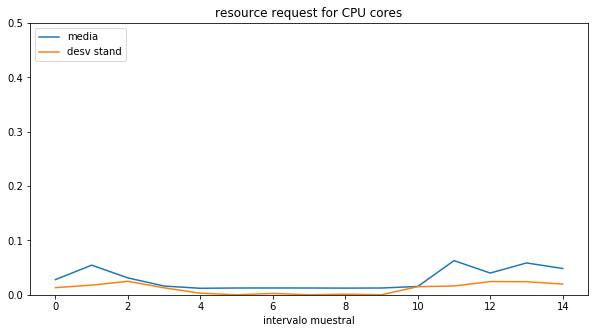

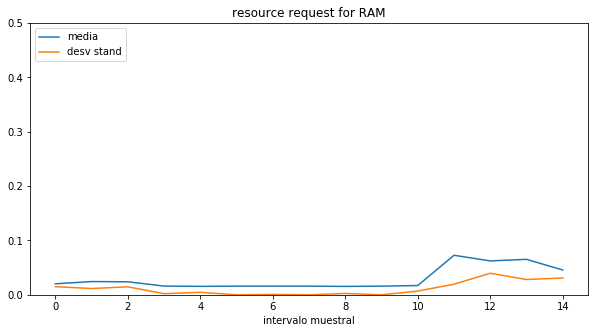

In [6]:

for variable in ['res_req_CPU_cor', 'res_req_RAM']:
  
  y1 = [y[variable]['mean'] for y in intervalos_muestrales]

  y2 = [y[variable]['std'] for y in intervalos_muestrales]

  # eje x
  t = np.arange(0, len(intervalos_muestrales))
  
  plt.ylim(0,.5) # se asigna .5 en vez de 1 para ampliar mejor la visualizacion
  
  # graficas
  plt.plot(t, y1,  t, y2)

  plt.legend(('media', 'desv stand'), loc='upper left')
  plt.title(etiqueta_col[variable])
  plt.xlabel('intervalo muestral')
  plt.show()

Como se puede observar en las graficas anteriores, ambas variables (res_req_CPU_cor y res_req_RAM), se comportan como **series de tiempo estacionarias**, en las muestras de secuencias tomadas del dataset, lo que permite analizarlas con las herramientas de analisis de series de tiempo estacionarias.

Ahora en base a estos resultados, se enfoca el interes en algo mas critico como resulta ser el tiempo que transcurre entre cada solicitud de recursos, y se repetira el mismo analisis anterior para esta.

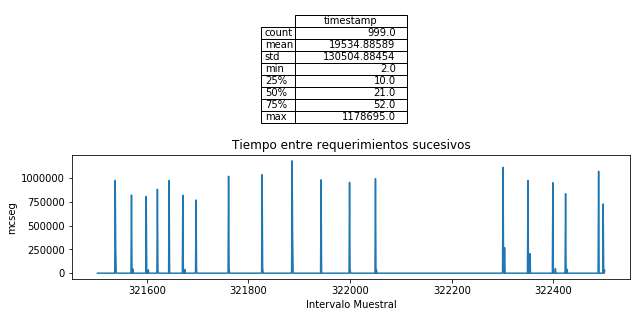

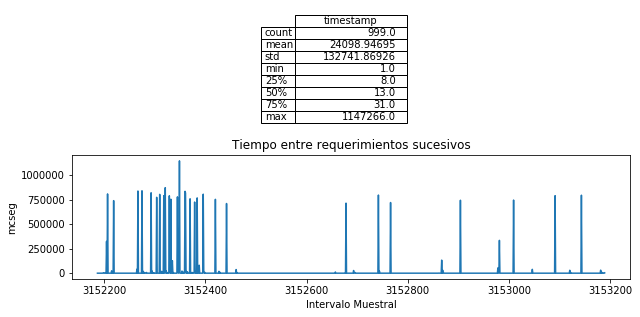

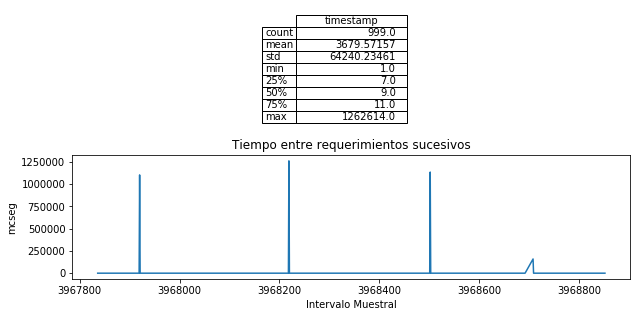

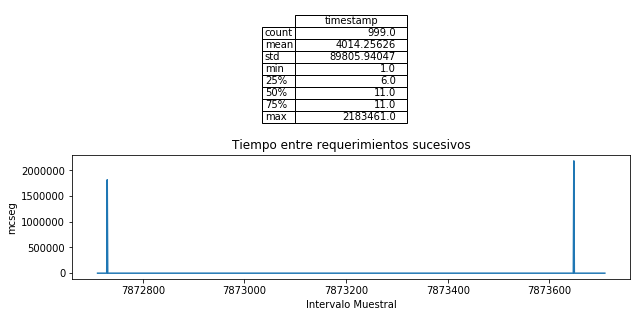

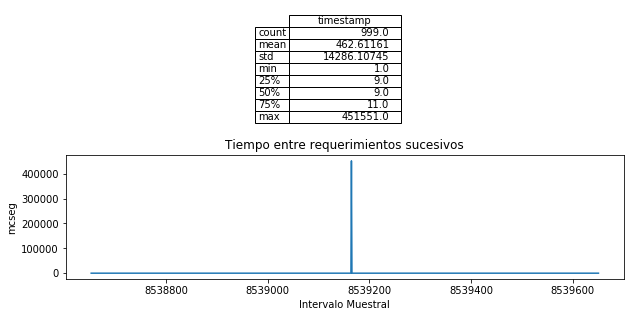

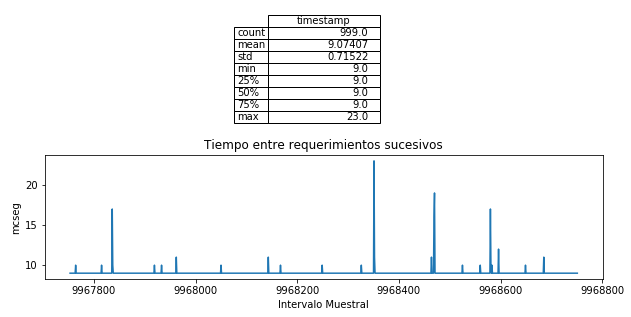

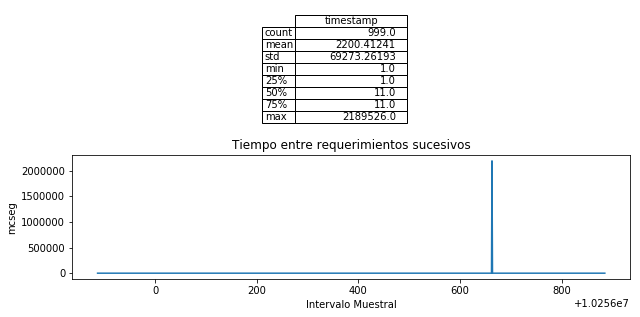

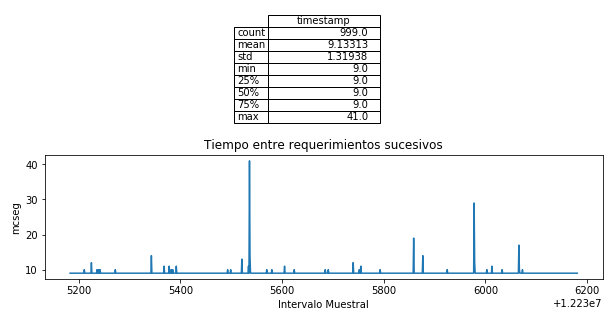

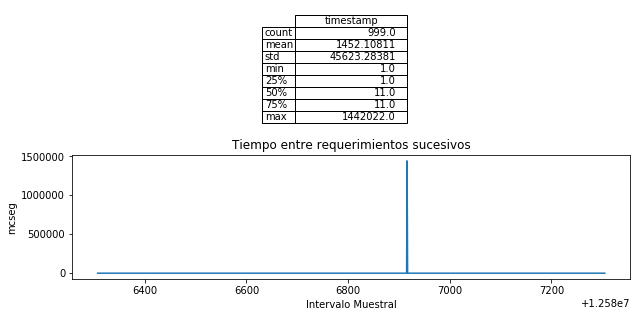

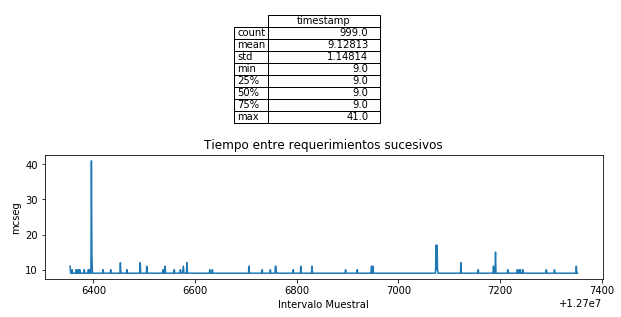

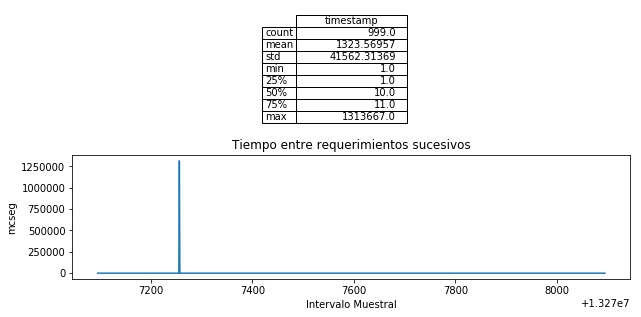

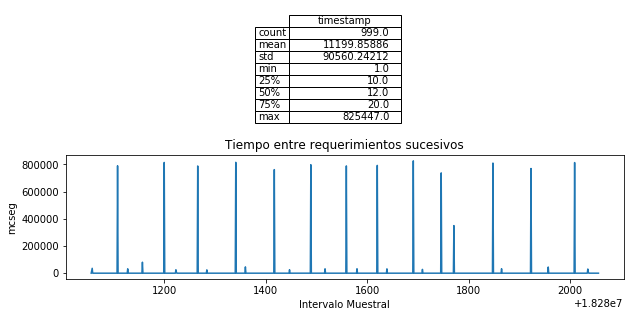

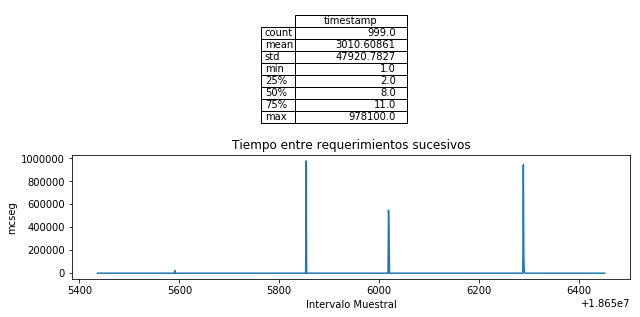

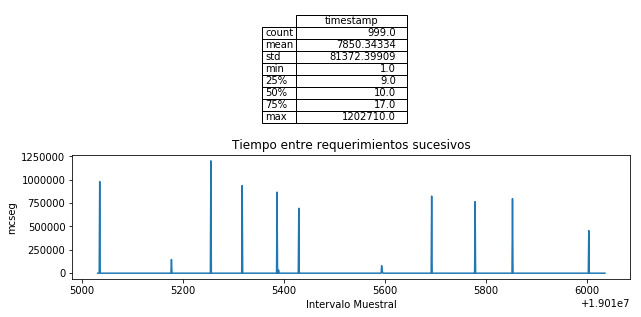

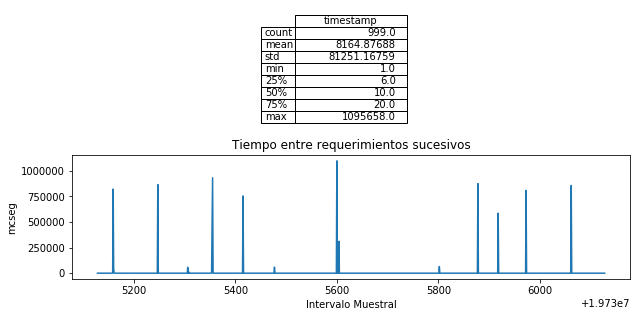

In [10]:
intervalos_muestrales = []
for li, ls in intervalos:
  prueba = datos[li:ls]

  tiempo_entre_solic = prueba[['timestamp']].diff()

  # se almacenan valores de estimaciones de interes para la investigacion
  estimadores = tiempo_entre_solic[['timestamp']].describe()
  dic_estimadores = {'timestamp':{'mean':estimadores.timestamp['mean'],
                                       'std':estimadores.timestamp['std']}}
  intervalos_muestrales.append(dic_estimadores)
  

  t = tiempo_entre_solic.index
  
  y = tiempo_entre_solic.timestamp
  
  fig, axs = plt.subplots(2, 1)
  axs[0].axis('tight')
  axs[0].axis('off')    

  colWidths=[0.2]
  estimadores = np.round(estimadores, 5)
  the_table = axs[0].table(cellText=estimadores.values,colLabels=estimadores.columns,
                           rowLabels=estimadores.index, loc='center', colWidths=colWidths)  

  # graficas
  axs[1].plot(t, y)

  #axs[1].axis([li, ls, 0, 10000])
  axs[1].set(xlabel='Intervalo Muestral', ylabel='mcseg',
         title='Tiempo entre requerimientos sucesivos')
plt.show()

El las graficas anteriores, se puede observar que los picos (valores altos) en el tiempo transcurrido entre una solicitud y otra correponden a momentos de descanso, en los cuales no hubo registro de solicitud de recursos

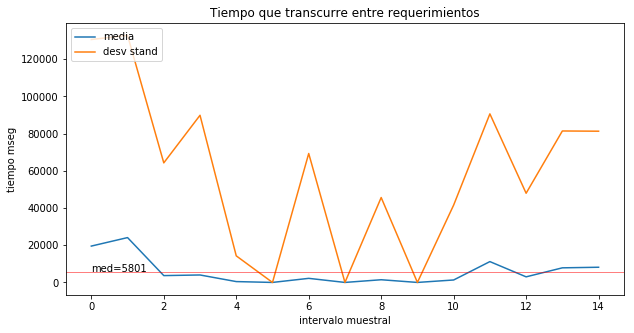

In [11]:
y1 = [y['timestamp']['mean'] for y in intervalos_muestrales]

y2 = [y['timestamp']['std'] for y in intervalos_muestrales]

prom_y1 = sum(y1)/len(y1)

# eje x
t = np.arange(0, len(intervalos_muestrales))
  
#plt.ylim(0,.5) # se asigna .5 en vez de 1 para ampliar mejor la visualizacion
  
# graficas
plt.plot(t, y1,  t, y2)

plt.legend(('media', 'desv stand'), loc='upper left')
plt.title('Tiempo que transcurre entre requerimientos')
plt.axhline(y=prom_y1, xmin=0, xmax=len(intervalos_muestrales), color ='r', linewidth=.5)
plt.annotate('med='+str(int(prom_y1)),xy=(0,prom_y1+0.5))
plt.xlabel('intervalo muestral')
plt.ylabel('tiempo mseg')
plt.show()

Como se puede observar en el anterior grafico, para la variable **"tiempo transcurrido entre solicitud de recursos"**,  tiene un comportamiento estacionario en la media, aunque la desviacion estandar fluctua mas devido a los picos (momentos de descanso) observados en graficos anteriores. La linea roja representa la media estimada general de los valores de tiempo transcurrido entre requerimientos en esta muestra, en microsegundos (1 seg = 1.000.000 mseg), expresa la densidad de requerimientos para los periodos de tiempo muestreados en el dataset

# Ahora se va a analizar la caracteristica job_id, basandose en la relevancia de aparicion en este dataset

Se describe el comportamiento de la frecuencia de job_id , lo que se interpreta como la demanda de recursos caracteristica de cada job_id.

se crea una nueva variable para categorizar cada JOB en base a la demanda de recursos en el transcurso del dataset, dandole los siguientes valores categoricos:

1.   jobs que hacen requerimientos de recursos al menos un 10%
2.   jobs que hacen requerimientos de recursos mas del .0.1% pero menos del 10%
3.   jobs que hace requerimientos de recursos menos de un 0.1%







In [135]:
grups = datos.groupby(['job_ID']).size()

grups = grups.sort_values(ascending=False)

grups = grups/grups.sum()

df_grup_JOB = pd.DataFrame({'frecu':grups})

df_grup_JOB['categ'] = '2' # correponde al segmento medio valor por defecto
df_grup_JOB.loc[df_grup_JOB.frecu <=.001, 'categ'] = '3'
df_grup_JOB.loc[df_grup_JOB.frecu >=.1, 'categ'] = '1'

# ahora se muestra la frecuencia de Jobs por categoria con su correspondiente requerimiento de recursos

df_grup_JOB.groupby(['categ'])
a = df_grup_JOB.groupby(['categ']).size()
b = df_grup_JOB.groupby(['categ']).sum()

print('Cat.  FrecJobs   Demanda/Requer')
for i in range(len(a)):
    print('{:2}  {:6}         {:.3%}'.format(b.index[i], a[i], b.values[i][0]))


Cat.  FrecJobs   Demanda/Requer
1        1         42.896%
2       39         21.501%
3    47101         35.604%


# En base a estos resultados
Se procede a crear una variable categorica en el dataset principal, que va contener la clasificacion obtenida segun el analisis de frecuencias anterior